In [76]:
import sys
sys.path.append("..")
import helper.methods as m
import numpy as np

In [2]:
import notears.notears.notears.linear as linear
import notears.notears.notears.utils as utils

In [73]:
X = np.loadtxt("../../data/real_data/sem/gene_sachs/data_sachs.txt")

In [128]:
X2 = X - np.mean(X)

In [170]:
W, h_val = linear.notears_linear(X2, lambda1 = 0.0, loss_type = "l2", w_threshold = 0.30)

h: 8.174138699246214e-09.
rho: 1000000000000.0.
loss: (1.0385507618106176, array([ 1.08898063e+00, -4.65512843e-01,  2.86423627e-04, -1.77806836e-04,
       -1.73630153e-04, -1.03851597e-04, -6.14818737e-02,  7.02532119e-05,
       -7.64770470e-05, -2.22138480e-04,  5.13956999e-01, -2.07149922e-05,
        8.67943283e-01, -6.93877151e-05,  4.92246020e-05,  7.70928102e-05,
        1.04061430e-04, -1.31953310e-01, -1.66840117e-04,  8.90168376e-05,
       -6.24820432e-05,  8.29891515e-01,  2.32215402e-01, -7.63611057e-02,
        1.15693702e+00,  1.30522741e-02, -5.96516643e-01,  3.51376894e-04,
        4.56283153e-02,  7.87099400e-02,  4.50555594e-01,  2.22945217e-01,
        6.68723267e-01,  1.26826695e-01,  1.80929437e-01, -1.67850314e-04,
        9.41786417e-01, -1.42066629e-04,  2.80902525e-04, -1.96898423e-01,
        5.10178175e-01,  1.06959549e+00, -2.28441395e-04,  5.71915210e-01,
       -4.34665192e-01,  4.29452465e-01, -5.39850035e-04, -8.51697453e-02,
        1.60208630e+00, -

In [177]:
B_true = np.array([
#    raf, mek, plc,pip2,pip3, erk, akt, pka, pkc, p38, jnk
    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], # raf
    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], # mek
    [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], # plc
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], # pip2
    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], # pip3
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], # erk
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], # akt
    [1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0], # pka
    [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0], # pkc
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], # p38
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], # jnk
])

In [186]:
print(utils.count_accuracy(B_true, W != 0))
print(utils.count_accuracy(B_true, W_OMP != 0))

{'fdr': 0.9047619047619048, 'tpr': 0.1, 'fpr': 0.5428571428571428, 'shd': 29, 'nnz': 21}
{'fdr': 0.92, 'tpr': 0.1, 'fpr': 0.6571428571428571, 'shd': 31, 'nnz': 25}


In [173]:
print(np.round(W != 0))

[[0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]]


In [174]:
import helper.methods as m
import helper.helper as h

In [185]:
W_OMP, _ = m._K_OMP(X2, X2, normalize = True, F = [], is_sem = True)
W_OMP[np.abs(W_OMP) < 0.30] = 0.0

In [159]:
print(h.MSE(W_OMP, X2, True))
print(h.MSE(W, X2, True))
print(h.MSE(np.zeros((11, 11)), X, True))

2.758687682280171
4.550692612000228
30.77189917990489


In [189]:
help(cdt.causality.graph.GES(score='obs'))

Help on GES in module cdt.causality.graph.GES object:

class GES(cdt.causality.graph.model.GraphModel)
 |  GES algorithm **[R model]**.
 |  
 |  **Description:** Greedy Equivalence Search algorithm. A score-based
 |  Bayesian algorithm that searches heuristically the graph which minimizes
 |  a likelihood score on the data.
 |  
 |  **Required R packages**: pcalg
 |  
 |  **Data Type:** Continuous (``score='obs'``) or Categorical (``score='int'``)
 |  
 |  **Assumptions:** The output is a Partially Directed Acyclic Graph (PDAG)
 |  (A markov equivalence class). The available scores assume linearity of
 |  mechanisms and gaussianity of the data.
 |  
 |  Args:
 |      score (str): Sets the score used by GES.
 |      verbose (bool): Defaults to ``cdt.SETTINGS.verbose``.
 |  
 |  Available scores:
 |      + int: GaussL0penIntScore
 |      + obs: GaussL0penObsScore
 |  
 |  .. note::
 |     Ref:
 |     D.M. Chickering (2002).  Optimal structure identification with greedy search.
 |     Jou

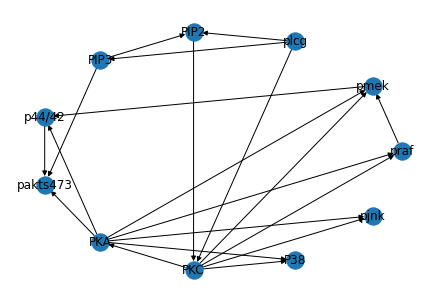

   praf  pmek   plcg   PIP2   PIP3  p44/42  pakts473    PKA    PKC   P38  pjnk
0  26.4  13.2   8.82  18.30  58.80    6.61      17.0  414.0  17.00  44.9  40.0
1  35.9  16.5  12.30  16.80   8.13   18.60      32.5  352.0   3.37  16.5  61.5
2  59.4  44.1  14.60  10.20  13.00   14.90      32.5  403.0  11.40  31.9  19.5
3  73.0  82.8  23.10  13.50   1.29    5.83      11.8  528.0  13.70  28.6  23.1
4  33.7  19.8   5.19   9.73  24.80   21.10      46.1  305.0   4.66  25.7  81.3
{'fdr': 0.7941176470588235, 'tpr': 0.35, 'fpr': 0.7714285714285715, 'shd': 30, 'nnz': 34}


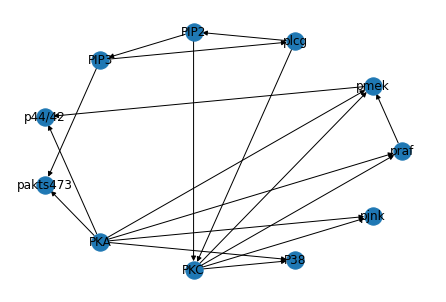

In [193]:
import cdt
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

G = nx.DiGraph(B_true, directed = True)
G = nx.relabel_nodes(G, mapping)
nx.draw(G, pos = nx.circular_layout(G), with_labels = True)
plt.show()

data, graph = cdt.data.load_dataset('sachs')
print(data.head())
nx.draw(graph, pos = nx.circular_layout(G), with_labels = True)
#print(data.size)



def GES(X, B_true):
    model = cdt.causality.graph.GES(score='obs')
    output_graph = model.predict(pd.DataFrame(X))
#     print(X)
#     print(np.array(transform_matrix(np.array(nx.adjacency_matrix(output_graph).todense()), B_true)))
    return utils.count_accuracy(B_true, transform_matrix(np.array(nx.adjacency_matrix(output_graph).todense()), B_true)), output_graph

ges_score, G_GES = GES(data, B_true)
print(ges_score)

In [181]:
mapping = {0:  "praf",       1: "pmek",  2: "plcg", 3: "PIP2", 
           4:  "PIP3", 5: "p44/42",        6: "pakts473",      7: "PKA",
           8:  "PKC",     9: "P38",        10: "pjnk",
          }

G = nx.relabel_nodes(G, mapping)

In [29]:
def transform_matrix(B_est, B_true):
    # transform B_est into a directed graph, favourably.
    
    # find all undirected edges
    undirected_edges = np.where(B_est * B_est.T == 1)
    for i, j in zip(undirected_edges[0], undirected_edges[1]):
        # check only one triangle
        if i > j:
            # check if the true matrix has this edge
            if B_true[i][j] == 1:
                # keep this one, remove the other
                B_est[j][i] = 0
            elif B_true[j][i] == 1:
                # keep the other, remove this one
                B_est[i][j] = 0
            else:
                # does not matter, remove the LT one
                B_est[j][i] = 0
                
    return B_est